In [2]:
# read csv files and merge them

import pandas as pd
test_data = pd.read_csv("Data/test_values.csv")
train_data = pd.read_csv("Data/train_values.csv")
train_label = pd.read_csv("Data/train_labels.csv")


In [3]:
test_data.head()
train_data.head()


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_label.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [5]:
# Concatenate
result = pd.concat([train_data,train_label], axis=1)
result.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,802906,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,28830,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,94947,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,590882,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,201944,3


In [6]:
# Merge - by default it does inner join
# valiate will validate if all the col are unique or not
result1 = pd.merge(train_data,train_label, validate="one_to_one")
result1.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [7]:
# join
result2 = train_data.join(train_label, on='building_id', how = 'inner', lsuffix='_left', rsuffix='_right')
result2.head()

,building_id,building_id_left,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id_right,damage_grade
1,28830,28830,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,125642,2
2,94947,94947,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,523292,2
4,201944,201944,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,795702,2
10,7962,7962,17,1119,12188,2,20,9,6,t,...,0,0,0,0,0,0,0,0,336916,1
22,219578,219578,10,90,11215,2,0,6,5,t,...,0,0,0,0,0,0,0,0,909135,2


In [8]:
pwd


'/Users/sakshibhatnagar/Desktop/EarthquakeModeling/GorkaEartquakemodeling'

In [10]:
#pandas groupby to create distribution : similar to grouping in sql

group = result1.groupby(['age']).count().reset_index()
group.head()

,age,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,26041,26041,26041,26041,26041,26041,26041,26041,26041,...,26041,26041,26041,26041,26041,26041,26041,26041,26041,26041
1,5,33697,33697,33697,33697,33697,33697,33697,33697,33697,...,33697,33697,33697,33697,33697,33697,33697,33697,33697,33697
2,10,38896,38896,38896,38896,38896,38896,38896,38896,38896,...,38896,38896,38896,38896,38896,38896,38896,38896,38896,38896
3,15,36010,36010,36010,36010,36010,36010,36010,36010,36010,...,36010,36010,36010,36010,36010,36010,36010,36010,36010,36010
4,20,32182,32182,32182,32182,32182,32182,32182,32182,32182,...,32182,32182,32182,32182,32182,32182,32182,32182,32182,32182


In [11]:
result1[result1['age']==5]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
16,633759,6,706,12267,2,5,7,5,t,r,...,0,0,0,0,0,0,0,0,0,2
45,440102,7,157,5265,1,5,11,3,n,i,...,0,1,0,0,0,0,0,0,0,1
61,1044113,8,440,4222,2,5,5,5,t,r,...,0,0,0,0,0,0,0,0,0,2
67,648002,9,546,12341,1,5,9,3,t,u,...,0,0,0,0,0,0,0,0,0,2
75,1041381,10,310,8321,2,5,3,4,t,r,...,0,0,0,0,0,0,0,0,0,2
77,426951,16,350,320,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,2
88,931198,4,1202,5735,1,5,5,3,t,u,...,1,0,0,0,0,0,0,0,0,2
89,250898,17,409,1701,2,5,11,7,n,r,...,0,0,0,0,0,0,0,0,0,3
94,722503,8,1225,3244,3,5,5,6,t,r,...,0,0,0,0,0,0,0,0,0,3
107,71947,7,749,11262,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,2


In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#barplot = sns.load_dataset("result1")
#age_damage = sns.catplot(x="age", y="damage_grade", hue="class", kind="bar", data=barplot)
#group.plot.bar(x='age', y='damage_grade', stacked=True)


#plt.bar(age, damage_grade)
#matplotlib.pyplot.bar(age, damage_grade)
result1.plot(x = "age", y="damage_grade")
plt.show()

<Figure size 640x480 with 1 Axes>

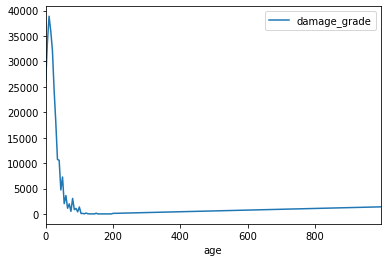

In [13]:
group.plot(x = "age", y="damage_grade")
plt.show()

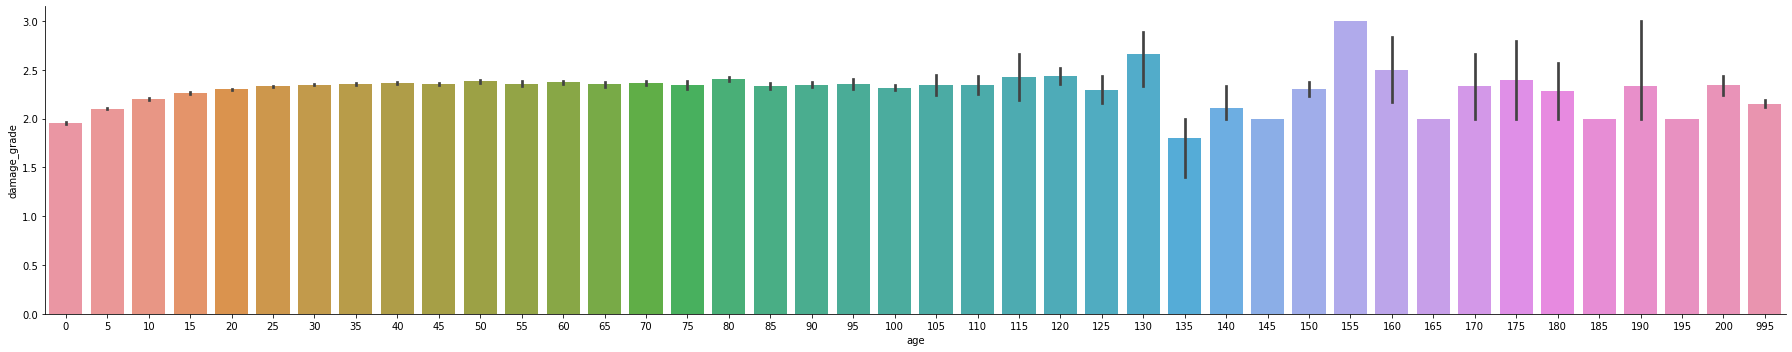

In [62]:
age_damage = sns.catplot(x="age", y="damage_grade", kind="bar", data=result1, aspect =5)


#plt.bar(age, damage_grade)
#matplotlib.pyplot.bar(age, damage_grade)

In [14]:
df = result1.groupby(['age','damage_grade']).count().reset_index()[['age','damage_grade','building_id']]

In [74]:
df.head()

,age,damage_grade,building_id
0,0,1,7213
1,0,2,12721
2,0,3,6107
3,5,1,5590
4,5,2,19030


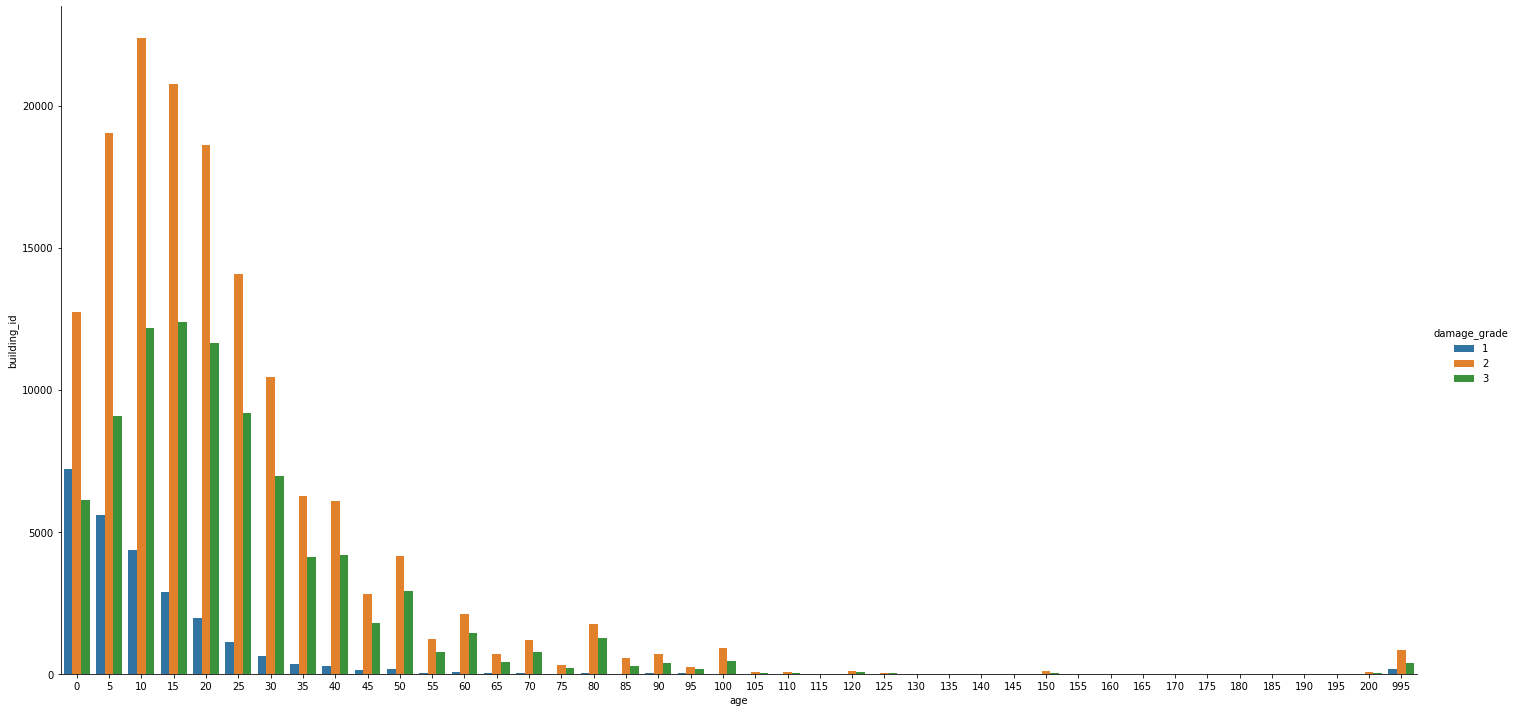

In [104]:
#titanic = sns.load_dataset("titanic")
sns.catplot(x="age", y="building_id", hue="damage_grade", kind="bar", data=df,aspect=2,height=10)

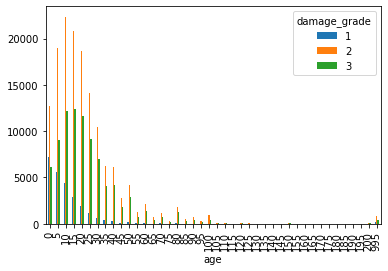

In [23]:
df_agg = df.groupby(['age', 'damage_grade'])['building_id'].sum().unstack()
df_agg.plot(kind='bar', stacked=False)

In [25]:
df_avg_damage=result1.groupby('age').mean().reset_index()[['age','damage_grade']]
df_avg_damage

,age,damage_grade
0,0,1.957529
1,5,2.103481
2,10,2.200689
3,15,2.263455
4,20,2.300510
5,25,2.329599
6,30,2.349678
7,35,2.351074
8,40,2.369827
9,45,2.354277


##### damage grade is directly correlated to age

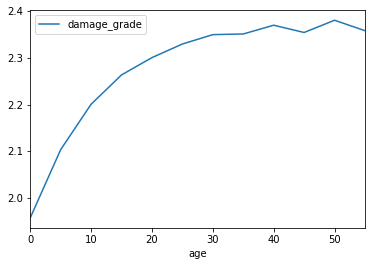

In [110]:
df_avg_damage[df_avg_damage.age<60].plot(x = "age", y="damage_grade")
plt.show()

In [17]:
df1 = result1.groupby(['foundation_type','damage_grade']).count().reset_index()[['foundation_type','damage_grade','building_id']]
df1

,foundation_type,damage_grade,building_id
0,h,1,358
1,h,2,579
2,h,3,511
3,i,1,6004
4,i,2,4354
5,i,3,221
6,r,1,10720
7,r,2,125515
8,r,3,82961
9,u,1,3689


### Foundation Type vs Damage Grade:

1. 'r' type foundation has the most damage while 'h' type has the least
2. Correlation ??

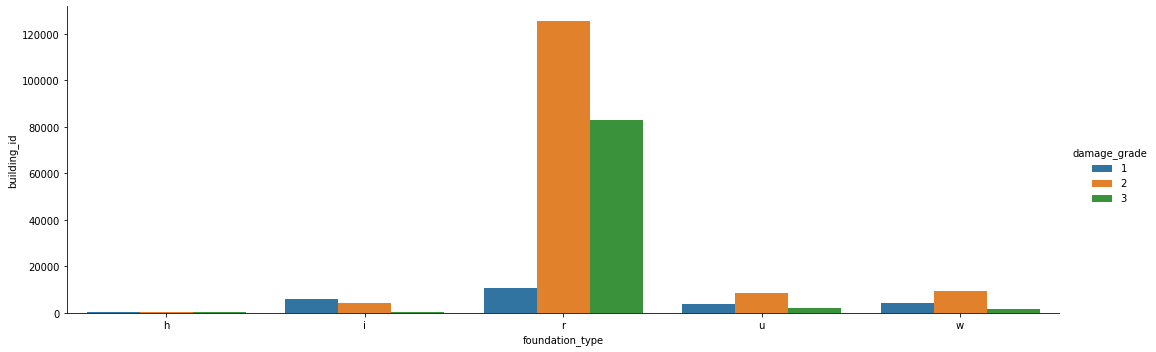

In [21]:
sns.catplot(x="foundation_type", y="building_id", hue="damage_grade", kind="bar", data=df1, aspect=3)

In [26]:
df_avg_damage1 = result1.groupby('foundation_type').mean().reset_index()[['foundation_type','damage_grade']]
df_avg_damage1

,foundation_type,damage_grade
0,h,2.105663
1,i,1.453351
2,r,2.329573
3,u,1.883661
4,w,1.810954


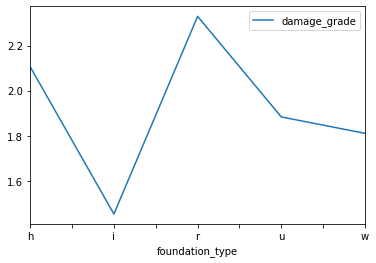

In [27]:
df_avg_damage1.plot(x = "foundation_type", y="damage_grade")
plt.show()

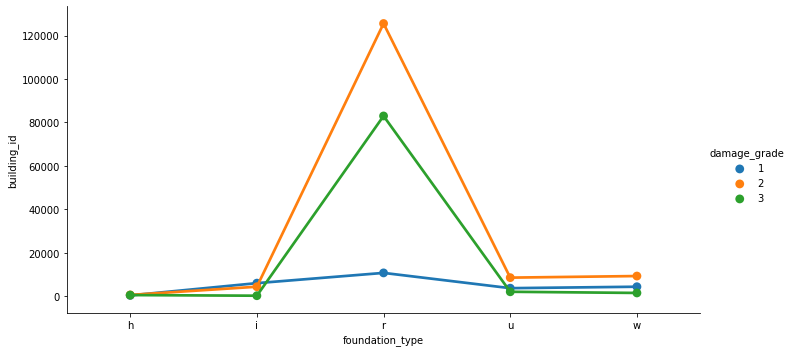

In [36]:
sns.catplot(x = "foundation_type", y="building_id", hue = "damage_grade", kind="point", data=df1, aspect=2)

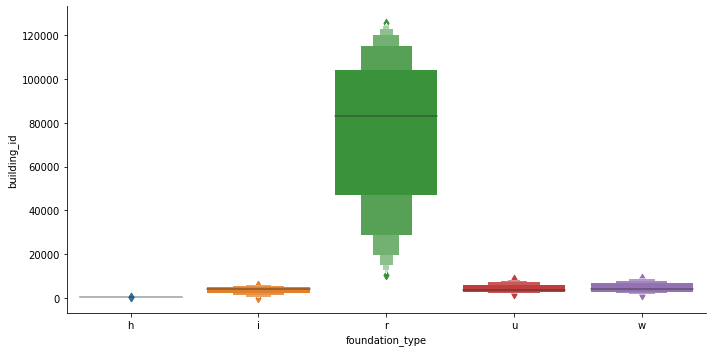

In [42]:
sns.catplot(x = "foundation_type", y="building_id", kind="boxen", data=df1.sort_values("damage_grade"), aspect = 2, );

In [28]:
df2 = result1.groupby(['has_secondary_use','damage_grade']).count().reset_index()[['has_secondary_use','damage_grade','building_id']]
df2

,has_secondary_use,damage_grade,building_id
0,0,1,20876
1,0,2,130544
2,0,3,80025
3,1,1,4248
4,1,2,17715
5,1,3,7193


### Secondary use of the buildeing vs Damage
1. Building with no secondary use (or residential) are prone to more damage

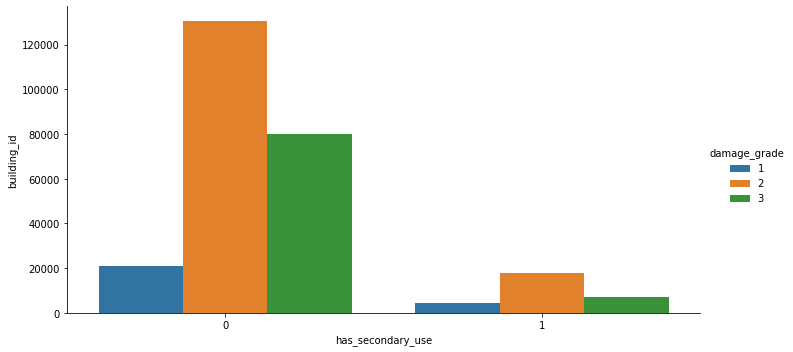

In [32]:
sns.catplot(x = "has_secondary_use", y="building_id", hue = "damage_grade", kind="bar", data=df2, aspect=2)

In [33]:
df_avg_damage2 = result1.groupby('has_secondary_use').mean().reset_index()[['has_secondary_use','damage_grade']]
df_avg_damage2

,has_secondary_use,damage_grade
0,0,2.255564
1,1,2.101008


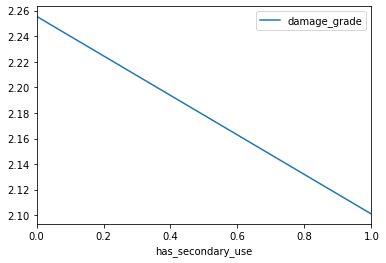

In [34]:
df_avg_damage2.plot(x = "has_secondary_use", y="damage_grade")
plt.show()

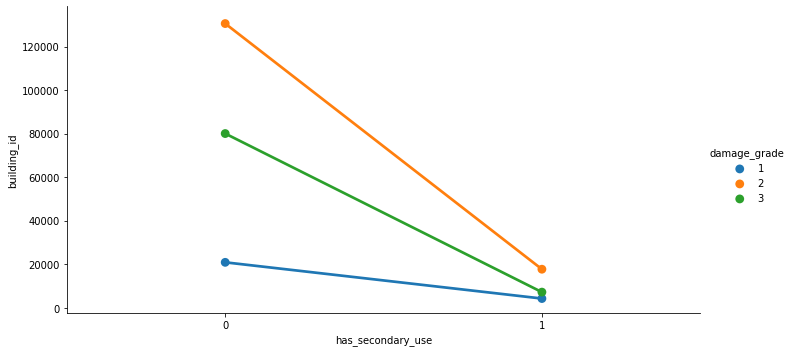

In [35]:
sns.catplot(x = "has_secondary_use", y="building_id", hue = "damage_grade", kind="point", data=df2, aspect=2)